In [0]:
#Analytics Processs



#For a business problem :
1: Information gap
2: Analytics Objective

In [0]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['BlackFriday.csv']))
print(data.head(5))


Saving BlackFriday.csv to BlackFriday.csv
   User_ID Product_ID Gender  ... Product_Category_2  Product_Category_3 Purchase
0  1000001  P00069042      F  ...                NaN                 NaN     8370
1  1000001  P00248942      F  ...                6.0                14.0    15200
2  1000001  P00087842      F  ...                NaN                 NaN     1422
3  1000001  P00085442      F  ...               14.0                 NaN     1057
4  1000002  P00285442      M  ...                NaN                 NaN     7969

[5 rows x 12 columns]


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['BlackFriday.csv']))
print(data.head(5))

   User_ID Product_ID Gender  ... Product_Category_2  Product_Category_3 Purchase
0  1000001  P00069042      F  ...                NaN                 NaN     8370
1  1000001  P00248942      F  ...                6.0                14.0    15200
2  1000001  P00087842      F  ...                NaN                 NaN     1422
3  1000001  P00085442      F  ...               14.0                 NaN     1057
4  1000002  P00285442      M  ...                NaN                 NaN     7969

[5 rows x 12 columns]


In [0]:
print(data.head(5))


   User_ID Product_ID Gender  ... Product_Category_2  Product_Category_3 Purchase
0  1000001  P00069042      F  ...                NaN                 NaN     8370
1  1000001  P00248942      F  ...                6.0                14.0    15200
2  1000001  P00087842      F  ...                NaN                 NaN     1422
3  1000001  P00085442      F  ...               14.0                 NaN     1057
4  1000002  P00285442      M  ...                NaN                 NaN     7969

[5 rows x 12 columns]


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [0]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


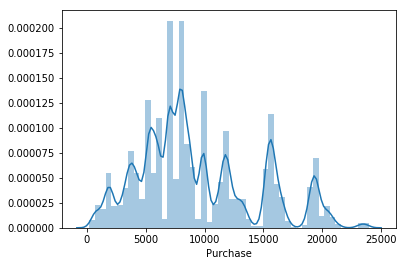

In [0]:
import seaborn as sns
sns.distplot(data['Purchase'])  #Particular product sold for less rate . Thats y the spike

((array([-4.70179993, -4.51742685, -4.41760717, ...,  4.41760717,
          4.51742685,  4.70179993]),
  array([  185,   185,   185, ..., 23961, 23961, 23961])),
 (4855.347474502099, 9333.859852635065, 0.9747611824841472))

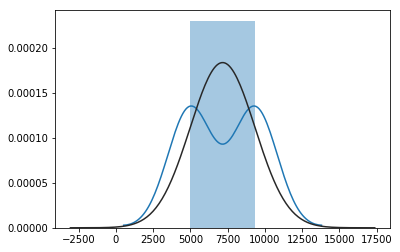

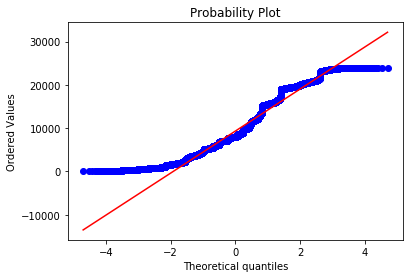

In [0]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
#norm.fit(data['Purchase'])
sns.distplot(norm.fit(data['Purchase']),fit=norm)
#Deviation from Normal distribution
fig = plt.figure()
#QQ plot 
stats.probplot(data['Purchase'],plot=plt)

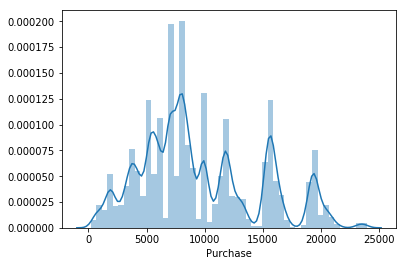

In [0]:
sns.distplot(data['Purchase'][data['Gender']=='M'])


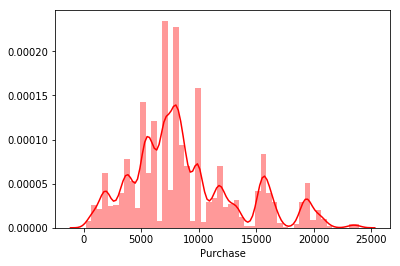

In [0]:
sns.distplot(data['Purchase'][data['Gender']=='F'],color='Red')


(array([ 8884., 13763., 35754., 27854., 18715.,  6008., 12426.,  2497.,
         5768.,   528.]),
 array([  185. ,  2562.4,  4939.8,  7317.2,  9694.6, 12072. , 14449.4,
        16826.8, 19204.2, 21581.6, 23959. ]),
 <a list of 10 Patch objects>)

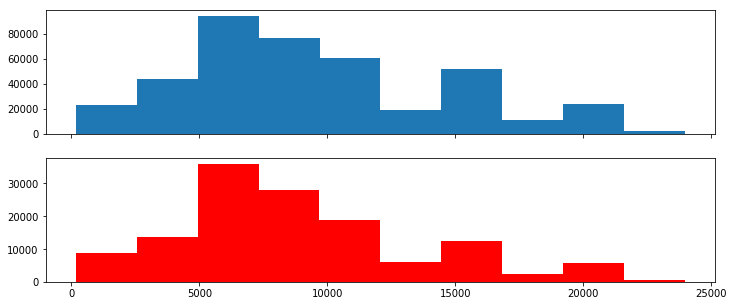

In [0]:
fig,ax = plt.subplots(2,1,figsize=(12,5),sharex=True)
ax[0].hist(data['Purchase'][data['Gender']=='M'])
ax[1].hist(data['Purchase'][data['Gender']=='F'],color='Red')

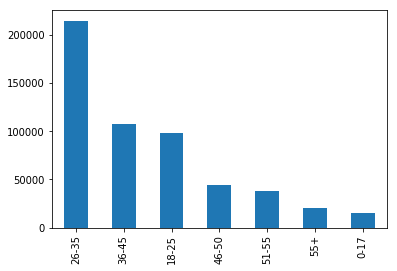

In [0]:
data['Age'].value_counts().plot.bar()
#data['Age'].countplot()

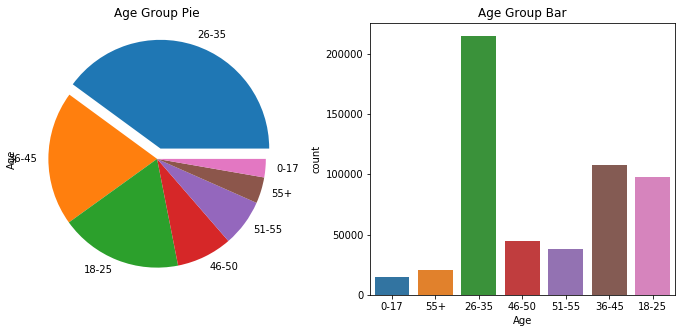

In [0]:
fig,ax =plt.subplots(1,2,figsize=(12,5))
data['Age'].value_counts().plot.pie(explode=[0.1,0,0,0,0,0,0],ax=ax[0])
ax[0].set_title('Age Group Pie')
ax[1].set_title('Age Group Bar')

sns.countplot('Age',data=data,ax=ax[1])


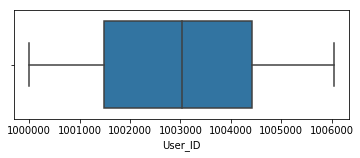

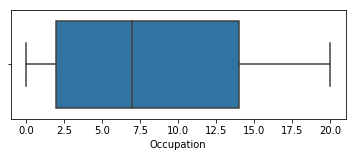

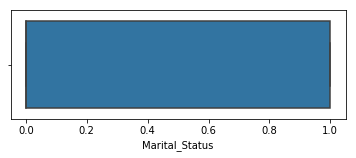

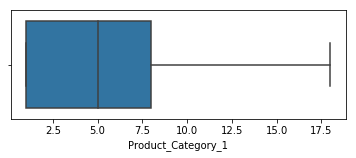

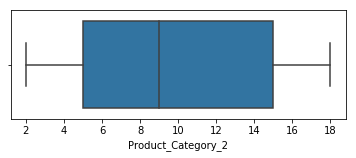

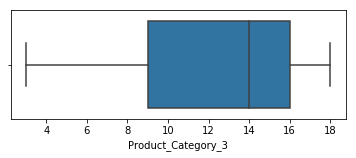

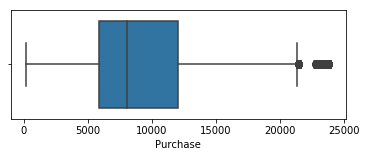

In [0]:
num_list = list(data.select_dtypes(exclude=['object']).columns)

for col in num_list:
  plt.figure(figsize=(6,2))
  sns.boxplot(col,data=data)

In [0]:
d= pd.get_dummies(data['Gender'],drop_first=True)


In [0]:
##Handling cataegorical colums

data['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [0]:
data2= data['Age'].to_frame()
data1 = pd.get_dummies(data2,columns=['Age'],drop_first=True)
data1.head()

,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1


In [0]:
data3= data[['Gender','Age']]
data4 = pd.get_dummies(data3,columns=['Gender','Age'],drop_first=True)
data4.head()

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1


### LAbel Encoding####


In [0]:
from sklearn.preprocessing import LabelEncoder


data_age = data[['Age']]
data_gender  =  data[['Gender']]
le =  LabelEncoder()
data['Age_code'] = le.fit_transform(data_age)
data['Age_code'].head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0    0
1    0
2    0
3    0
4    6
Name: Age_code, dtype: int64

In [0]:
le.classes_


array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [0]:
{index:value for index,value in enumerate(le.classes_)}

{0: '0-17',
 1: '18-25',
 2: '26-35',
 3: '36-45',
 4: '46-50',
 5: '51-55',
 6: '55+'}

###Standardisation
### Normalisation

In [0]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

mm = MinMaxScaler()
sd = StandardScaler()

data_p = data[['Purchase']]

dfmm = mm.fit_transform(data_p['Purchase'].values.reshape(-1,1))
dfsd  = sd.fit_transform(data_p['Purchase'].values.reshape(-1,1))
data_p['Purchase_mm'] = dfmm
data_p['Purchase_sd'] = dfsd
data_p.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Purchase,Purchase_mm,Purchase_sd
0,8370,0.344255,-0.193507
1,15200,0.631519,1.177699
2,1422,0.052027,-1.588402
3,1057,0.036676,-1.661681
4,7969,0.327389,-0.274012


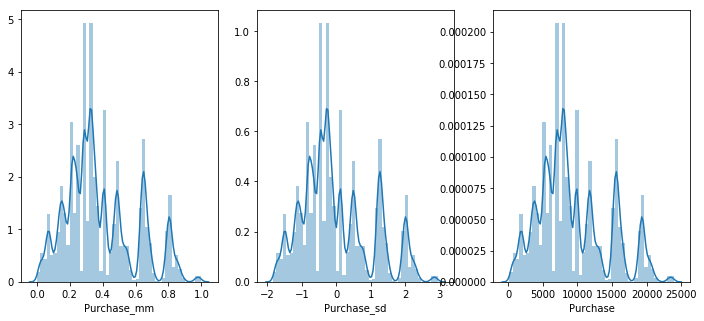

In [0]:
fig,ax = plt.subplots(1,3,figsize=(12,5))

sns.distplot(data_p['Purchase_mm'],ax=ax[0])
sns.distplot(data_p['Purchase_sd'],ax=ax[1])
sns.distplot(data_p['Purchase'],ax=ax[2])

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
Age_code                      537577 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 53.3+ MB


### Train and Test Split


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
x = pd.DataFrame(np.array([10,20,30,40,50,60,70,80,90,100]))
y = pd.DataFrame(np.array([1,2,3,4,5,6,7,8,9,10]))
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(X_train,X_test)



     0
0   10
7   80
2   30
9  100
4   50
3   40
6   70     0
8  90
1  20
5  60


In [0]:
x=data.drop('Purchase',axis=1)
y=data['Purchase']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(X_train.shape,X_test.shape)

(376303, 12) (161274, 12)


In [0]:
ss = StandardScaler()

XXtrains = ss.fit_transform(X_train['Product_Category_1'].values.reshape(1,-1))
XXtests = ss.transform(X_train['Product_Category_1'].values.reshape(1,-1))